Loading the Libraries, Dataset and Visualizing it 

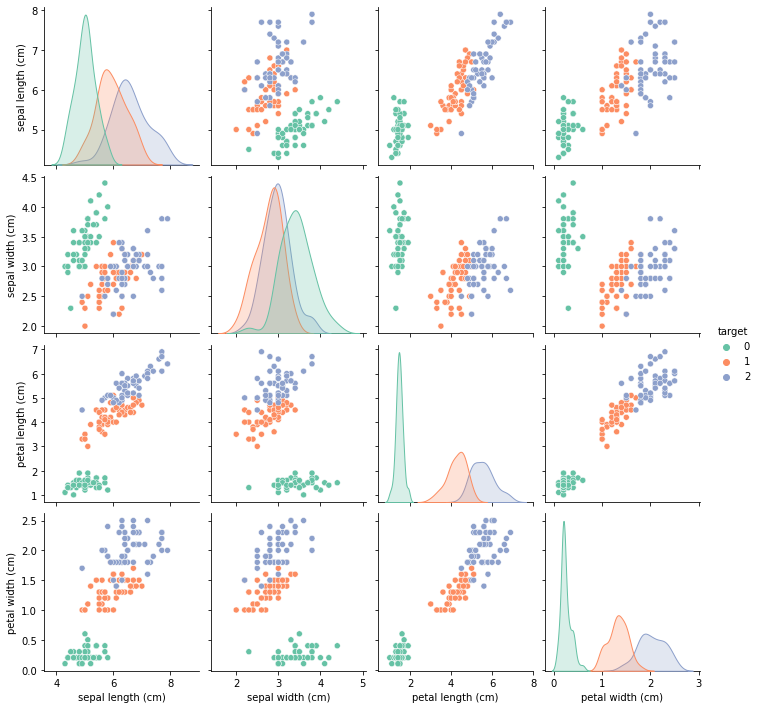

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

iris = load_iris()

iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])
iris_df['target'] = iris_df['target'].astype(int)

# Displaying dataset
sns.pairplot(data=iris_df, hue='target', palette='Set2')
plt.show()


Splitting and testing diffenrent ML Approaches also having the accuracy analysis

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Logistic Regression accuracy: 96.67 %
Decision Tree accuracy: 94.17 %
Random Forest accuracy: 94.17 %
SVM accuracy: 95.00 %


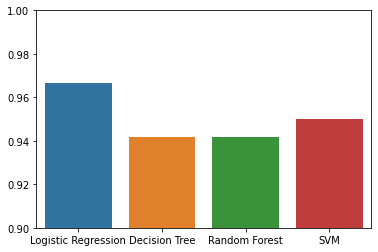

In [2]:


X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

accuracies = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    accuracy = np.mean(scores)
    accuracies[name] = accuracy
    print(f"{name} accuracy: {100*accuracy:.2f} %")


sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.ylim([0.9, 1])
plt.show()



Choosing the best model and training the dataset on the same

In [3]:
#We know that Logistic Regression has the best accuracy from the above graph
best_model = max(models, key=accuracies.get)
model = models[best_model]
model.fit(X_train, y_train)

# Now we will make predictions on test data using best model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"{best_model} accuracy on test set: {100*accuracy:.2f}")



Logistic Regression accuracy on test set: 100.00


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix

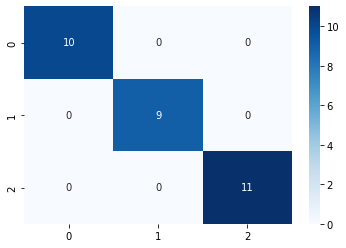

In [4]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()


Doing Sample Predictions

In [5]:

sample_index = np.random.choice(range(len(X_test)))
sample_data = X_test[sample_index]
sample_label = y_test[sample_index]
sample_prediction = model.predict([sample_data])[0]
print(f"Random sample data: {sample_data}")
print(f"Actual label: {iris.target_names[sample_label]}")
print(f"Predicted label: {iris.target_names[sample_prediction]}")

Random sample data: [6.3 3.3 4.7 1.6]
Actual label: versicolor
Predicted label: versicolor
